In [1]:
"""
K- Nearest Neighbor
1.  Build a machine learning model to predict user will click the ad or not based on his experience and 
estimated salary for a given dataset.
"""

'\nK- Nearest Neighbor\n1.  Build a machine learning model to predict user will click the ad or not based on his experience and \nestimated salary for a given dataset.\n\n'

In [2]:
#import libraries
import pandas as pd
import seaborn as sb

#libarry for feature scaling
from sklearn.preprocessing import StandardScaler

# #Classification library
from sklearn.neighbors import KNeighborsClassifier

import pickle 
import os, sys
import csv

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import importlib.util

In [3]:
# importing template file 
spec = importlib.util.spec_from_file_location("Util_class", "/home/admin1/PycharmProjects/Machine-Learning/Week10/Util/util.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
# creating object of Template class
obj_util = foo.Util_class()

In [4]:
# load dataset
dataset_original = pd.read_csv ("Social_Network_Ads.csv")
dataset = dataset_original
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
print("Dataset has {} rows and {} Columns".format(dataset.shape[0],dataset.shape[1])) 

Dataset has 400 rows and 5 Columns


In [6]:
# check dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [7]:
# descibe the dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [8]:
# handling missing data if nessesary
"""
if missing values are present
imputer = Imputer(missing_values=0, axis=0)
imputer = imputer.fit(x_data[:, 3:16])
"""
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
# check for duplicate values
dataset.duplicated().sum()

0

In [10]:
#categorical data
type(dataset.Gender)

pandas.core.series.Series

In [11]:
#Check categpries for categorical data
dataset.Gender[:5]

0      Male
1      Male
2    Female
3    Female
4      Male
Name: Gender, dtype: object

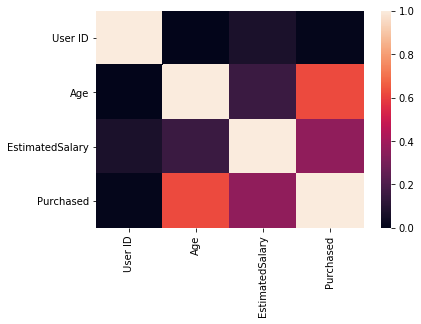

In [12]:
#Display heatmap to show correlation between diff variables
corr = dataset.corr()
sb.heatmap(corr)

Skewness of y is 0.596902836080957


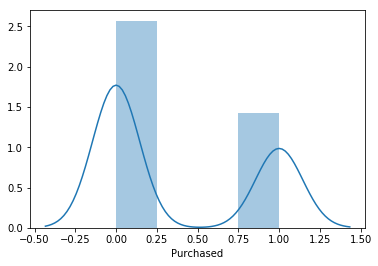

In [13]:
# check skewness for target variable
sb.distplot(dataset['Purchased'])
print ("Skewness of y is {}".format(dataset['Purchased'].skew()))

In [14]:
print (corr['Purchased'].sort_values(ascending=False)[:10], '\n') #top 10 values
print ('----------------------')
print (corr['Purchased'].sort_values(ascending=False)[-5:]) #last 5 values`


Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
User ID            0.007120
Name: Purchased, dtype: float64 

----------------------
Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
User ID            0.007120
Name: Purchased, dtype: float64


In [15]:
# create directory to store csv files
# os.mkdir("CSV_files")

In [16]:
#split dataset into train, test and cross validation also save csv files
obj_util.splitdata(dataset, 0.30, 0.40,"CSV_files" )

train :  (280, 5)  test :  (120, 5)
train_data :  (168, 5)  crossV_data :  (112, 5)


In [17]:
# load train dataset
train_dataset = pd.read_csv ("CSV_files/train_file.csv")
print("Train Dataset has {} rows and {} Columns".format(train_dataset.shape[0],train_dataset.shape[1])) 
# load dataset for Cross Validation
CV_dataset = pd.read_csv ("CSV_files/CValidation_file.csv")
print("Cross validation Dataset has {} rows and {} Columns".format(CV_dataset.shape[0],CV_dataset.shape[1])) 

Train Dataset has 168 rows and 5 Columns
Cross validation Dataset has 112 rows and 5 Columns


In [18]:
#data Preprocessing
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 5 columns):
User ID            168 non-null int64
Gender             168 non-null object
Age                168 non-null int64
EstimatedSalary    168 non-null int64
Purchased          168 non-null int64
dtypes: int64(4), object(1)
memory usage: 6.6+ KB


In [19]:
# seperate fetures and label

# features -> age and estimated salary
x_train = train_dataset.iloc[:,[2,3]].values
# label -> purchased
y_train = train_dataset.iloc[:,4].values  

# Dont reshape any variable it gives error for visualisation "IndexError: too many indices for array"
# y_train = y_train.reshape(-1,1)
print("x_train :",x_train.shape,"& y_train:",y_train.shape)

#for cross validation
# features -> age and estimated salary
x_crossval = CV_dataset.iloc[:,[2,3]].values
# label -> purchased
y_crossval = CV_dataset.iloc[:,4].values  

print("x_cv :",x_crossval.shape,"& y_cv:",y_crossval.shape)

x_train : (168, 2) & y_train: (168,)
x_cv : (112, 2) & y_cv: (112,)


In [20]:
#feature scalling (here data will be converted into float)
def feature_scalling(x_train,x_crossval):
    sc_x = StandardScaler()
    x_train = sc_x.fit_transform(x_train)
    
    sc_x_cv = StandardScaler()
    x_crossval = sc_x.fit_transform(x_crossval)
    return sc_x, x_train,sc_x_cv, x_crossval
    
sc_x, x_train,sc_x_cv, x_crossval = feature_scalling(x_train,x_crossval)


Module created
classifier object KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


 y_prediction: [0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1
 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0
 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0
 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1]
(168,)


Average accuracy_score: 89.28571428571429
Average precision-recall score: 80.56
Average Roc-AUC: 89.592


Confusion Matrix:
 [[86 12]
 [ 6 64]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


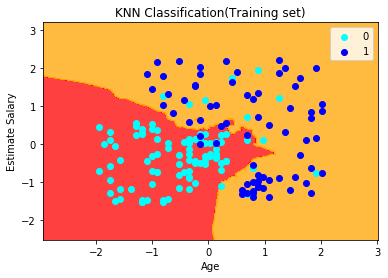


Pikle file created


In [21]:
class KNN_sklearn():
    
    def create_module(self,x_train,y_train):
        # fitting KNN Classification to the training set
        classifier = KNeighborsClassifier()
        classifier.fit(x_train,y_train)
        return classifier
    

def main():
    #class obj created
    obj  = KNN_sklearn()

    # create KNN classification module
    classifier = obj.create_module(x_train,y_train)
    print("\nModule created")
    print("classifier object",classifier)

    # y prediction
    y_pre = obj_util.y_prediction(x_train, classifier)
    print("\n\n y_prediction:",y_pre)
    print(y_pre.shape)
    
    # Calculate accuracy
    accuracy_score,average_precision,auc=obj_util.accuracy(y_pre,y_train)
    print('\n\nAverage accuracy_score:' , accuracy_score)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('Average Roc-AUC: %.3f' % auc)

    # show confusion matrix
    cm = obj_util.confusion_matrix(y_train,y_pre)
    print("\n\nConfusion Matrix:\n",cm)
    
    obj_util.visualization(x_train,y_train, classifier, "KNN Classification(Training set)", 
                           "Age", "Estimate Salary")
    
    obj_util.create_piklefile(classifier,'KNN.pkl' )
    print("\nPikle file created")


if __name__ == '__main__':
    main()




 y_prediction: [0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0
 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1
 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1
 1]
(112,) (112,)


Average accuracy_score: 91.96428571428571
Average precision-recall score: 77.90
Average Roc-AUC: 93.438


Confusion Matrix:
 [[72  8]
 [ 1 31]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


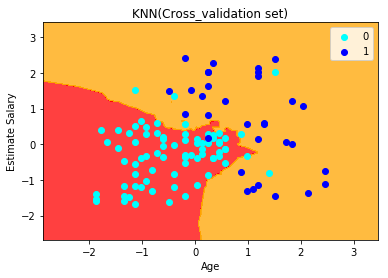

In [22]:
# cross validation        
def Cross_validation():
    # Load pickle file object
    file1 = open('KNN.pkl', 'rb')
    classifier1 = pickle.load(file1)

    # y_prediction ( cross validation) 
    y_predicted1 = obj_util.y_prediction(x_crossval, classifier1)
#     print("\n\n y_prediction:",y_predicted1)
    
    # Calculate accuracy
    accuracy_score,average_precision,auc=obj_util.accuracy(y_predicted1, y_crossval)
    print('\n\nAverage accuracy_score:' , accuracy_score)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('Average Roc-AUC: %.3f' % auc)

    # show Confusion matrix
    cm = obj_util.confusion_matrix(y_crossval, y_predicted1)
    print("\n\nConfusion Matrix:\n",cm)
#     print("\n\nConfusion Matrix:\n",metrics.confusion_matrix(y_crossval, y_predicted1))
    
    obj_util.visualization(x_crossval, y_crossval, classifier1, "KNN(Cross_validation set)", "Age", "Estimate Salary")
    
    
    

Cross_validation()
